In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import Lasso, ElasticNet, Ridge, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Load data

In [20]:
df = pd.read_csv("carbi.data.csv")

# drop unamed column
df = df.drop(['Unnamed: 0'], axis=1)

# cylimders dummies
temp = df[['cylinders']]
df = pd.get_dummies(df, columns=['cylinders'])
df['cylinders'] = temp

# get brand codes as categorial
df['brand_code'] = pd.Categorical(df.brand).codes

df.sample(2)

,displayments,horsepower,weight,acceleration,model year,cluster,mpg,origin_1,origin_2,origin_3,...,car name,brand,mpg_scaled,cylinders_str,origin_str,cylinders_4,cylinders_6,cylinders_8,cylinders,brand_code
153,250.0,105.0,3459,16.0,75,1,18.0,1,0,0,...,chevrolet nova,chevrolet,0.239362,6,1,0,1,0,6,6
301,105.0,70.0,2200,13.2,79,0,34.2,1,0,0,...,plymouth horizon,plymouth,0.670213,4,1,1,0,0,4,22


# Custom cross validation function

In [21]:
# parameters
loops = 50
test_size = 0.3
attributes = [
    'displayments',
    'horsepower',
    'weight',
    'acceleration',
    'model year',
#     'cluster',
    'origin_1',
    'origin_2',
    'origin_3',
#     'origin',
    'cylinders',
#     'cylinders_4',
#     'cylinders_6',
#     'cylinders_8',
#     'brand',
    'brand_code'
]

scale_x = True
scale_y = True
# scaler_factory = MinMaxScaler
scaler_factory = lambda: StandardScaler(with_mean=True, with_std=True)

x_data = df[attributes].values.copy()
y_data = (df[['mpg']]).values.copy().ravel()

def test_model_fn(model_factory):
    in_r2_score = 0
    out_r2_score = 0
    in_mse_error = 0
    out_mse_error = 0
    in_mae_error = 0
    out_mae_error = 0
    for i in range(loops):
        x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_size, random_state=i)

        scaler_x =  scaler_factory()
        if (scale_x):
            scaler_x.fit(x_train)
            x_train = scaler_x.transform(x_train)
            x_test = scaler_x.transform(x_test)

        scaler_y = scaler_factory()
        if (scale_y):
            scaler_y.fit(y_train.reshape(-1, 1))
            y_train_scaled = scaler_y.transform(y_train.reshape(-1, 1)).ravel()
#             y_train_scaled = normalize(y_train_scaled, axis=0)

        model = model_factory()

        if (scale_y):
            model = model.fit(x_train, y_train_scaled)
            y_test_pred = scaler_y.inverse_transform(model.predict(x_test))
            y_train_pred = scaler_y.inverse_transform(model.predict(x_train))
            y_pred = scaler_y.inverse_transform(model.predict(x_data))
        else:
            model = model.fit(x_train, y_train)
            y_test_pred = model.predict(x_test)
            y_train_pred = model.predict(x_train)                                

        in_mse_error += mean_squared_error(y_train, y_train_pred)
        out_mse_error += mean_squared_error(y_test, y_test_pred)
        
        in_mae_error += mean_absolute_error(y_train, y_train_pred)
        out_mae_error += mean_absolute_error(y_test, y_test_pred)
        
        in_r2_score += r2_score(y_train, y_train_pred)
        out_r2_score += r2_score(y_test, y_test_pred)
    
    if (scale_x):
        y_pred = model.predict(scaler_x.transform(x_data))
    else:
        y_pred = model.predict(x_data)
        
    if (scale_y):
        y_pred = scaler_y.inverse_transform(y_pred)
    
            
    print(model)
    print(f"IN MAE { in_mae_error / loops }")
    print(f"IN MSE { in_mse_error / loops }")
    print(f"IN r2 { in_r2_score / loops }")
    
    print(f"OUT MAE { out_mae_error / loops }")
    print(f"OUT MSE { out_mse_error / loops }")
    print(f"OUT r2 { out_r2_score / loops }")
    print()
    
#     print(pd.DataFrame(np.c_[y_train, y_train_pred],columns=['act', 'pred']))
#     print(pd.DataFrame(np.c_[y_test, y_test_pred],columns=['act', 'pred']))
#     print(pd.DataFrame(np.c_[y_data, y_pred],columns=['act', 'pred']))

    plt.figure(figsize=(10,6))
    plt.scatter(y_train, y_train_pred, color = 'b')
    plt.scatter(y_test, y_test_pred, color = 'g')
    plt.plot(y_data, y_data, color = 'r')
    plt.xlabel("Actual")
    plt.ylabel("Predictions")
    plt.title("Actual vs Predicted", fontsize=18, fontweight="bold")
    plt.show()
    

LinearRegression()
IN MAE 2.4917696797729425
IN MSE 10.361334375941329
IN r2 0.8279721321191178
OUT MAE 2.6164381052826764
OUT MSE 11.593911982548088
OUT r2 0.8131226490349797



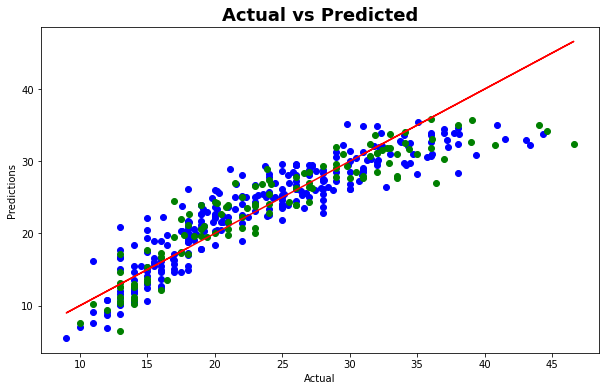

Lasso(normalize=True, tol=0.01)
IN MAE 6.491212463123028
IN MSE 60.23933148128978
IN r2 8.881784197001253e-18
OUT MAE 6.624939448441246
OUT MSE 62.730006144609476
OUT r2 -0.009439816570454052



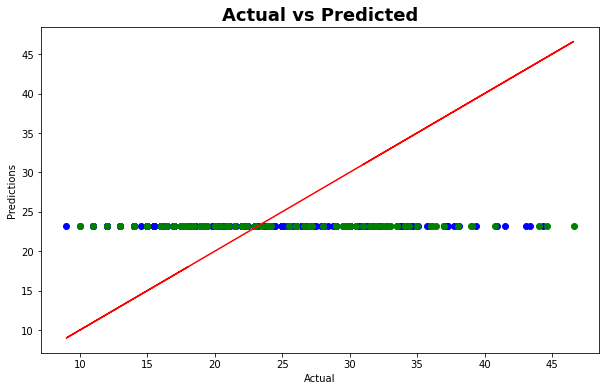

ElasticNet()
IN MAE 4.986995836634765
IN MSE 37.132941219852746
IN r2 0.38350655639441883
OUT MAE 5.095527511358842
OUT MSE 38.83595470365014
OUT r2 0.3760538197817977



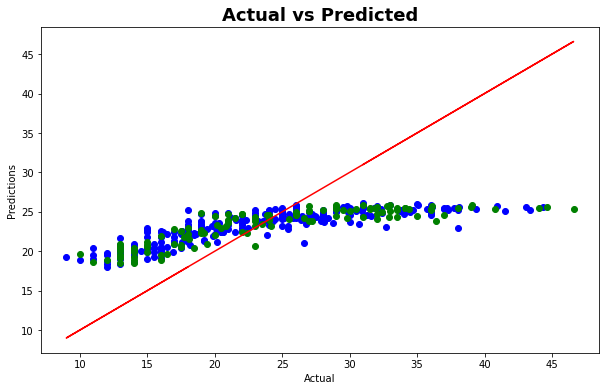

Ridge()
IN MAE 2.487501401227374
IN MSE 10.371319957676489
IN r2 0.8278063141257541
OUT MAE 2.6070878463682514
OUT MSE 11.553398528923713
OUT r2 0.813795916501009



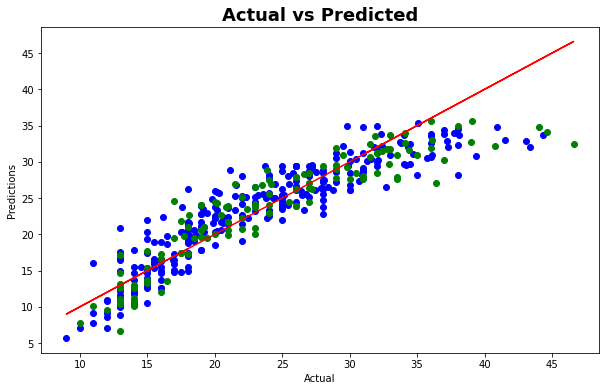

RandomForestRegressor()
IN MAE 0.7241512230215824
IN MSE 1.092522023453237
IN r2 0.9818436312257002
OUT MAE 1.9864671666666667
OUT MSE 8.160064955833334
OUT r2 0.8684556202332565



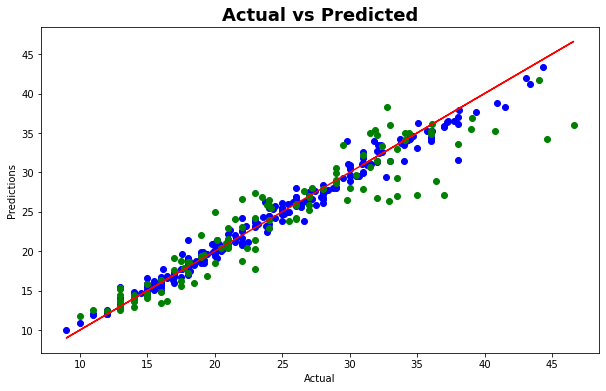

GradientBoostingRegressor(learning_rate=0.15, max_depth=2, random_state=0)
IN MAE 1.1458496416203405
IN MSE 2.317143142290966
IN r2 0.961506825217822
OUT MAE 2.0505491824901343
OUT MSE 8.429188586204187
OUT r2 0.8642651710260024



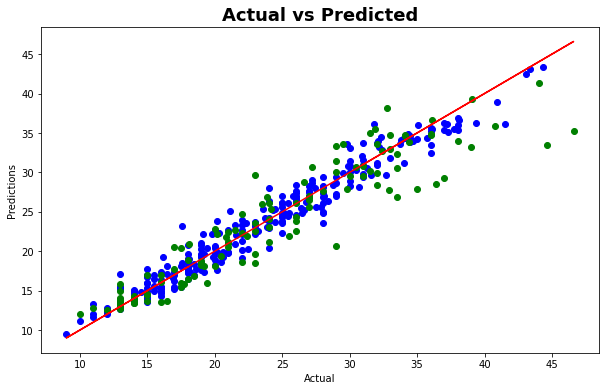

ExtraTreesRegressor()
IN MAE 7.873222457681341e-15
IN MSE 1.183191473285245e-28
IN r2 1.0
OUT MAE 1.952587666666666
OUT MSE 8.191723687
OUT r2 0.868039760014107



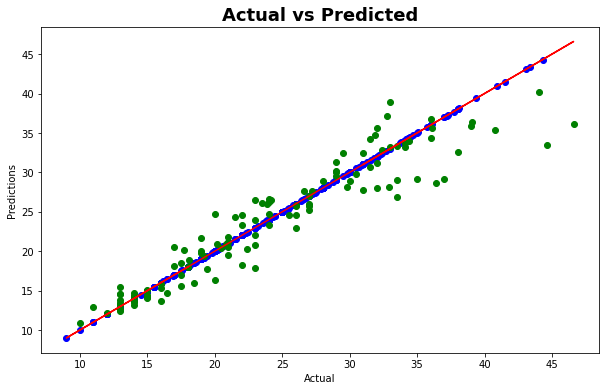

VotingRegressor(estimators=[('r1', SVR()), ('r2', SVR(kernel='linear')),
                            ('r3', LinearRegression())])
IN MAE 2.0381072382894625
IN MSE 7.850627380518015
IN r2 0.8696253154668578
OUT MAE 2.252720780015938
OUT MSE 9.652258977313167
OUT r2 0.8448765747203472



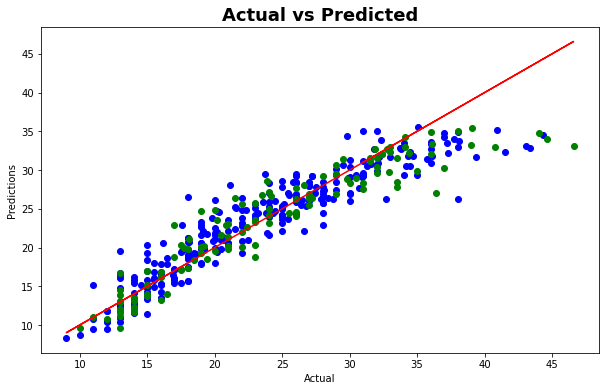

SVR(kernel='linear')
IN MAE 2.4296898194547136
IN MSE 11.120567315114824
IN r2 0.8153663690995847
OUT MAE 2.562223675477793
OUT MSE 12.203146767427759
OUT r2 0.8038940350245231



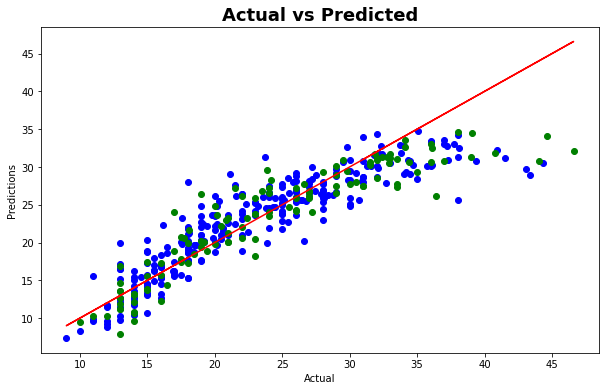

SVR()
IN MAE 1.5453652548712742
IN MSE 5.2280847094796545
IN r2 0.9131440662971967
OUT MAE 2.032865337086243
OUT MSE 8.31553497446836
OUT r2 0.8664156364697848



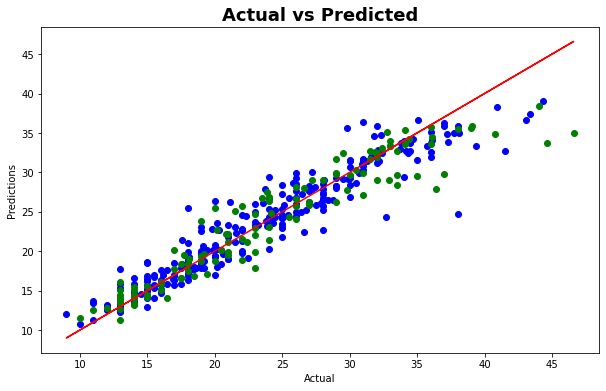

DecisionTreeRegressor()
IN MAE 6.3897728035980236e-18
IN MSE 1.1350516621885063e-32
IN r2 1.0
OUT MAE 2.5825333333333327
OUT MSE 14.114836666666667
OUT r2 0.7720121485700249



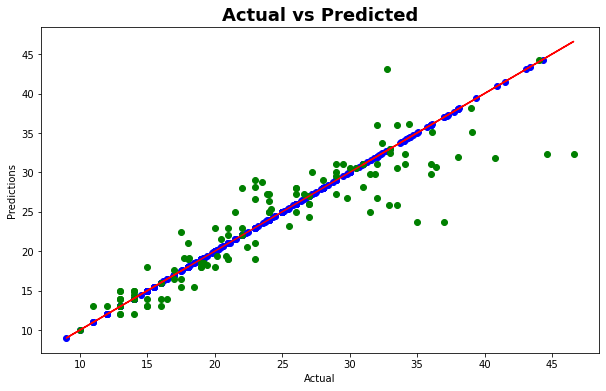

MLPRegressor(hidden_layer_sizes=(12, 6), max_iter=5000, solver='lbfgs')
IN MAE 0.8900638863822468
IN MSE 1.6426814784474146
IN r2 0.9727140713048483
OUT MAE 2.7661205287665482
OUT MSE 16.545118035438566
OUT r2 0.7329883786350638



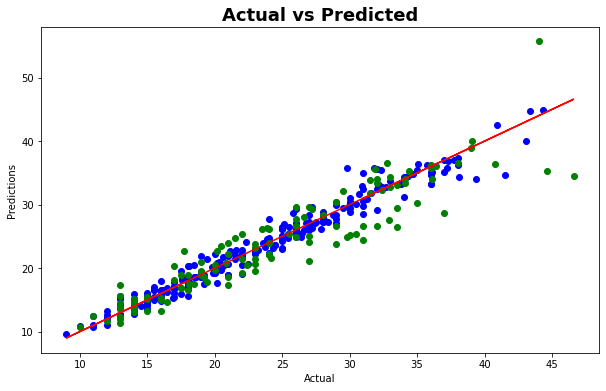

In [22]:
def test_models():
    def voting_regressor():
        r1 = SVR()
        r2 = SVR(kernel='linear')
        r3 = LinearRegression()

        model = VotingRegressor(estimators=[
            ('r1', r1), 
            ('r2', r2),
            ('r3', r3)
        ])
        return model
    
    models = [
        LinearRegression,
        lambda: Lasso(normalize=True, tol=1e-2),
        ElasticNet,
        Ridge,
        lambda: RandomForestRegressor(),
        lambda: GradientBoostingRegressor(learning_rate=0.15, max_depth=2, random_state=0),
        lambda: ExtraTreesRegressor(),
        voting_regressor,
        
        lambda: SVR(kernel="linear"),
        lambda: SVR(kernel="rbf"),
        
        DecisionTreeRegressor,
        
        lambda: MLPRegressor(max_iter=5000, activation='relu', hidden_layer_sizes= (12, 6), solver= 'lbfgs')
    ]

    for model_factory in models:
        test_model_fn(model_factory)
        
test_models()


In [25]:
from itertools import combinations

model = Pipeline([
    ('standarize', StandardScaler()),
    ('model', MLPRegressor(max_iter=200, random_state=0, solver="lbfgs", activation="relu"))
])

param_grid = {
    'model__alpha': list(np.arange(1, 10.5, 0.5)),
    'model__hidden_layer_sizes': list(combinations(range(15, 25), 2))
}

clf = GridSearchCV(model, param_grid, cv=21, scoring='r2')
clf.fit(x_data, y_data)


print("Best parameters set found on development set:")
print(clf.best_params_)
print(clf.best_score_)

In [27]:
model = Pipeline([
    ('standarize', StandardScaler()),
    ('model', ExtraTreesRegressor())
])

param_grid = {
#     'model__n_estimators': list(range(100,301,25)),
#     'model__max_depth': list(range(1,11,1)),
#     'model__learning_rate': list(np.arange(0.01,0.1,0.01)),
    'model__max_features': [
        'auto', 'sqrt', 'log2', 1, 2, 3, 4, 5, None
    ]
}

clf = GridSearchCV(model, param_grid, cv=5, scoring='r2', verbose=1)
clf.fit(x_data,y_data)


print("Best parameters set found on development set:")
print(clf.best_params_)
print(clf.best_score_)

